In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  # Para dividir los datos en entrenamiento y prueba
from sklearn.preprocessing import StandardScaler     # Para estandarizar los datos
from sklearn.metrics import confusion_matrix, classification_report  # Métricas de evaluación de modelos

# Opcionalmente, importa los algoritmos de machine learning que planeas utilizar
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [30]:
import pandas as pd
import os

# Ruta de la carpeta de archivos normales
ruta_normales = r'C:\Users\Usuario\Desktop\TECNICATURA\APRENDIZAJE AUTOMATICO\PROYECTO FALLAS\PROYECTO-DETECCION-DE-FALLA\cookiecutter-data-science\datos\NORMAL'

# Obtener la lista de archivos en la carpeta
archivos_normales = os.listdir(ruta_normales)

# Seleccionar los primeros 7 archivos
archivos_seleccionados_normales = archivos_normales[:7]

# Crear una lista para almacenar los DataFrames de cada archivo
dfs_normales = []

# Iterar sobre los archivos seleccionados y cargarlos en DataFrames
for archivo in archivos_seleccionados_normales:
    ruta_archivo = os.path.join(ruta_normales, archivo)
    df = pd.read_csv(ruta_archivo, header=None)  # Suponiendo que los archivos no tienen encabezado
    dfs_normales.append(df)

# Concatenar todos los DataFrames en uno solo
df_normales = pd.concat(dfs_normales, ignore_index=True)

# Mostrar las primeras filas del DataFrame para verificar
print("Datos de archivos normales:")
print(df_normales.head())


Datos de archivos normales:
        0         1         2         3        4         5        6         7
0  4.5595  0.175200  0.287210 -0.017751 -0.41565  0.032459 -0.11218 -0.128140
1  4.6038 -0.051295 -0.194050 -0.060071 -0.41809  0.036547 -0.11043  0.118310
2  4.5703 -0.969080  0.038033 -0.028329 -0.43081  0.041924 -0.14331 -0.071527
3  4.5870  0.891270  0.072973  0.007453 -0.40017  0.041090 -0.11984  0.043445
4  4.5887 -1.716000 -0.329290 -0.033063 -0.50281  0.040474 -0.25270  0.023901


In [31]:
# Rutas de las carpetas que contienen los archivos de desbalances
rutas_desbalances = [
    r'C:\Users\Usuario\Desktop\TECNICATURA\APRENDIZAJE AUTOMATICO\PROYECTO FALLAS\PROYECTO-DETECCION-DE-FALLA\cookiecutter-data-science\datos\DESBALANCES\6 GRAMOS',
    r'C:\Users\Usuario\Desktop\TECNICATURA\APRENDIZAJE AUTOMATICO\PROYECTO FALLAS\PROYECTO-DETECCION-DE-FALLA\cookiecutter-data-science\datos\DESBALANCES\10 GRAMOS',
    r'C:\Users\Usuario\Desktop\TECNICATURA\APRENDIZAJE AUTOMATICO\PROYECTO FALLAS\PROYECTO-DETECCION-DE-FALLA\cookiecutter-data-science\datos\DESBALANCES\15 GRAMOS',
    r'C:\Users\Usuario\Desktop\TECNICATURA\APRENDIZAJE AUTOMATICO\PROYECTO FALLAS\PROYECTO-DETECCION-DE-FALLA\cookiecutter-data-science\datos\DESBALANCES\20 GRAMOS',
    r'C:\Users\Usuario\Desktop\TECNICATURA\APRENDIZAJE AUTOMATICO\PROYECTO FALLAS\PROYECTO-DETECCION-DE-FALLA\cookiecutter-data-science\datos\DESBALANCES\25 GRAMOS',
    r'C:\Users\Usuario\Desktop\TECNICATURA\APRENDIZAJE AUTOMATICO\PROYECTO FALLAS\PROYECTO-DETECCION-DE-FALLA\cookiecutter-data-science\datos\DESBALANCES\30 GRAMOS',
    r'C:\Users\Usuario\Desktop\TECNICATURA\APRENDIZAJE AUTOMATICO\PROYECTO FALLAS\PROYECTO-DETECCION-DE-FALLA\cookiecutter-data-science\datos\DESBALANCES\35 GRAMOS'
]

# Lista para almacenar los DataFrames de los archivos de desbalances
dfs_desbalances = []

# Iterar sobre cada carpeta de desbalances
for ruta_carpeta_desbalance in rutas_desbalances:
    # Obtener la lista de archivos en la carpeta
    archivos_desbalance = os.listdir(ruta_carpeta_desbalance)

    # Seleccionar el primer archivo (puedes ajustar el criterio de selección si es necesario)
    if archivos_desbalance:
        archivo_seleccionado = archivos_desbalance[0]  # Seleccionar el primer archivo

        # Cargar el archivo seleccionado en un DataFrame
        ruta_archivo = os.path.join(ruta_carpeta_desbalance, archivo_seleccionado)
        df = pd.read_csv(ruta_archivo, header=None)  # Suponiendo que los archivos no tienen encabezado
        dfs_desbalances.append(df)

# Concatenar todos los DataFrames de desbalances en uno solo
df_desbalances = pd.concat(dfs_desbalances, ignore_index=True)

# Mostrar las primeras filas del DataFrame para verificar
print("\nDatos de archivos de desbalances:")
print(df_desbalances.head())



Datos de archivos de desbalances:
         0        1        2         3        4         5        6        7
0 -0.72045 -1.38060 -1.12120  0.043042  0.19377  0.017846 -0.88723  0.42433
1 -0.64913 -0.56770 -0.22977  0.051983  0.21621  0.024443 -0.53025 -0.29317
2 -0.68500 -1.65000 -1.24430 -0.232050  0.20017  0.023314 -0.69955  0.70456
3 -0.56136 -0.43616 -0.10885 -0.275050  0.23481  0.042759 -0.46237 -0.38232
4 -0.72766 -1.40620 -0.89527 -0.529050  0.22374  0.037663 -0.69903  0.64856


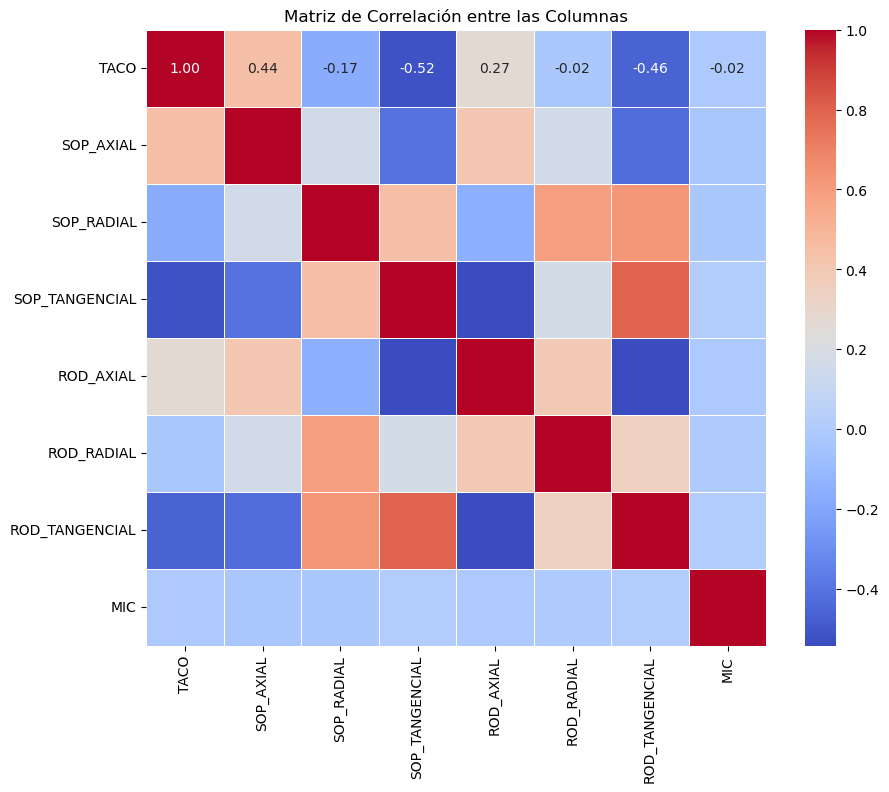

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asignar nombres a las columnas según la especificación dada
df.columns = ['TACO', 'SOP_AXIAL', 'SOP_RADIAL', 'SOP_TANGENCIAL', 'ROD_AXIAL', 'ROD_RADIAL', 'ROD_TANGENCIAL', 'MIC']

# Calcular la matriz de correlación
matriz_correlacion = df.corr()

# Visualización de la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre las Columnas')
plt.show()


In [33]:
# Contar el número de muestras en cada DataFrame

# DataFrame para archivos normales
print("Archivos Normales:")
for i, df_normal in enumerate(dfs_normales, 1):
    print(f"DataFrame {i}: {df_normal.shape[0]} filas")

# DataFrame para archivos de desbalance
print("\nArchivos de Desbalance:")
for i, df_desbalance in enumerate(dfs_desbalances, 1):
    print(f"DataFrame {i}: {df_desbalance.shape[0]} filas")


Archivos Normales:
DataFrame 1: 250000 filas
DataFrame 2: 250000 filas
DataFrame 3: 250000 filas
DataFrame 4: 250000 filas
DataFrame 5: 250000 filas
DataFrame 6: 250000 filas
DataFrame 7: 250000 filas

Archivos de Desbalance:
DataFrame 1: 250000 filas
DataFrame 2: 250000 filas
DataFrame 3: 250000 filas
DataFrame 4: 250000 filas
DataFrame 5: 250000 filas
DataFrame 6: 250000 filas
DataFrame 7: 250000 filas
